# Amazon Video Game Review Sentiment Analysis

In [330]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

In [331]:
dir(pd)

['ArrowDtype',
 'BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__all__',
 '__builtins__',
 '__cached__',
 '__deprecated_num_index_names',
 '__dir__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_is_numpy_dev',
 '_libs',
 '_testing',
 '

# A Quick look at the Dataset

### I cleaned this data myself on excel, as it was too messy to be done on pandas. the original data set is uploaded in the folder under VideoGames.json.

In [332]:
df = pd.read_csv('VGClean.csv', on_bad_lines='skip')
df2 = df.iloc[:,:3]
df2

/var/folders/6n/x3652qj92pv8yrnwqytnq3d40000gn/T/ipykernel_69517/1635813419.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('VGClean.csv', on_bad_lines='skip')


,Rating,asin,reviews
0,5,700026657,"This game is a bit hard to get the hang of, bu..."
1,4,700026657,I played it a while but it was alright. The st...
2,3,700026657,ok game.
3,2,700026657,"found the game a bit too complicated, not what..."
4,5,700026657,"great game, I love it and have played it since..."
...,...,...,...
110793,5,B01HFRICLE,This is the RIver City Ransom sequel that I've...
110794,5,B01HFRICLE,If you played and enjoyed River City Ransom on...
110795,4,B01HFRICLE,Old school classic
110796,3,B01HFRICLE,This nostalgic game with updaged game play ele...


In [333]:
print("This is the number of observations in my dataset:", len(df3.index))
cols = len(df2.axes[1])
print("Number of variables: ", cols)

This is the number of observations in my dataset: 3301
Number of variables:  3


# Data Exploration

### Here I am trying to figure out the number of times a product occurs to figure out what the most popular products are so that my graphs will be more visually appealing. 

In [338]:
df2['asin'].value_counts()

B000XJNTNS    614
B000VTQ3LU    490
B00ENFVJJO    426
B0013E9HP6    388
B00L59D9HG    358
             ... 
B003R7H5TC      1
B00004LN2S      1
B014DMSKD4      1
B000271MCG      1
B0030GG3PC      1
Name: asin, Length: 8500, dtype: int64

In [339]:
df3 = df2.groupby('asin').filter(lambda d: len(d) > 305)

In [340]:
df3['asin'].value_counts()

B000XJNTNS    614
B000VTQ3LU    490
B00ENFVJJO    426
B0013E9HP6    388
B00L59D9HG    358
B0017Q4DGI    357
B0029LJIFG    336
B000VJRU44    332
Name: asin, dtype: int64

In [341]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

8.0
6.0


<AxesSubplot: title={'center': 'Count of Reviews by Stars'}>

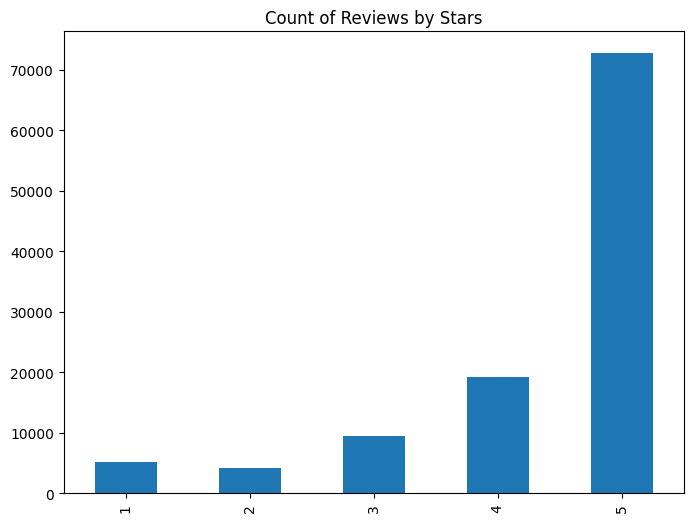

In [342]:
df2['Rating'].value_counts().sort_index().plot(kind='bar', title ="Count of Reviews by Stars")                               
                                              

<AxesSubplot: title={'center': 'Sentiment of the Top Products'}, xlabel='asin'>

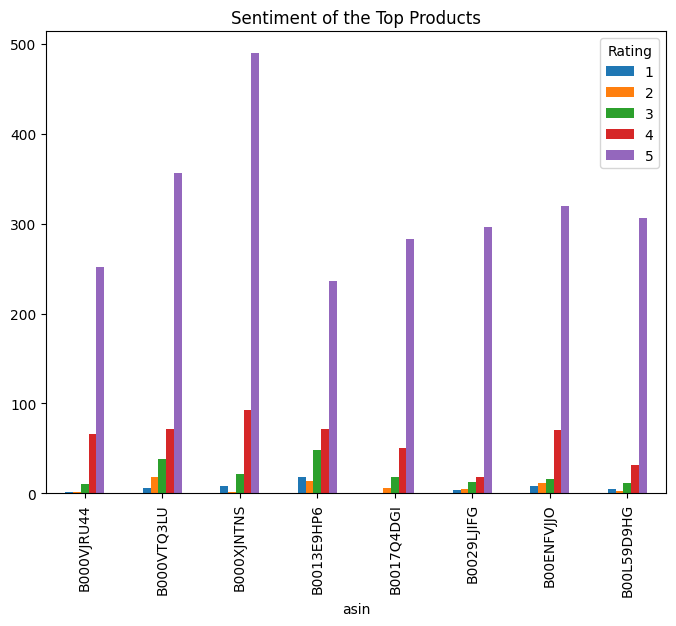

In [343]:
product = df3.groupby(['asin', 'Rating']).Rating.count().unstack()
product.plot(kind='bar', title = "Sentiment of the Top Products")


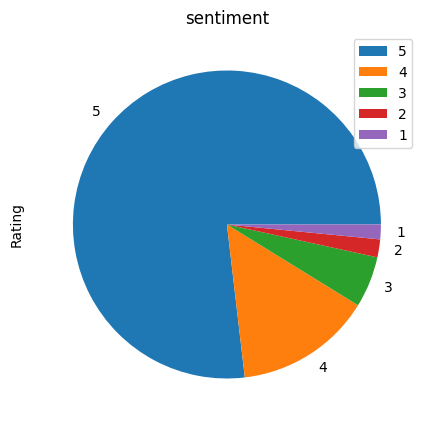

In [344]:
overall = df3['Rating'].value_counts()
overall.plot(kind='pie', title = "sentiment", figsize = (5,5))
plt.legend()
plt.show()

# Sentiment Analysis

In [345]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alyssajuarez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alyssajuarez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Using the Vader Model

### Vader tokenizes each word in a given text and marks is as positive, negative, or neutral. It then weights this to calculate a compound which determines if the general sentiment is positive or negatve. 

In [349]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer

In [350]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"

In [428]:
df2['scores'] = df2['reviews'].apply(lambda review: sid.polarity_scores(str(review)))

In [429]:
df2

,Rating,asin,reviews,scores,compound,comp_score
0,5,700026657,"This game is a bit hard to get the hang of, bu...","{'neg': 0.058, 'neu': 0.671, 'pos': 0.271, 'co...",0.7543,pos
1,4,700026657,I played it a while but it was alright. The st...,"{'neg': 0.132, 'neu': 0.61, 'pos': 0.259, 'com...",0.8302,pos
2,3,700026657,ok game.,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,pos
3,2,700026657,"found the game a bit too complicated, not what...","{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...",0.3400,pos
4,5,700026657,"great game, I love it and have played it since...","{'neg': 0.0, 'neu': 0.428, 'pos': 0.572, 'comp...",0.8934,pos
...,...,...,...,...,...,...
110793,5,B01HFRICLE,This is the RIver City Ransom sequel that I've...,"{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp...",0.8617,pos
110794,5,B01HFRICLE,If you played and enjoyed River City Ransom on...,"{'neg': 0.041, 'neu': 0.759, 'pos': 0.201, 'co...",0.7096,pos
110795,4,B01HFRICLE,Old school classic,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
110796,3,B01HFRICLE,This nostalgic game with updaged game play ele...,"{'neg': 0.065, 'neu': 0.627, 'pos': 0.308, 'co...",0.8151,pos


In [ ]:
df2['compound']  = df2['scores'].apply(lambda score_dict: score_dict['compound'])

df2.head()

In [355]:
df2['comp_score'] = df2['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df2.head()

,Rating,asin,reviews,scores,compound,comp_score
0,5,700026657,"This game is a bit hard to get the hang of, bu...","{'neg': 0.058, 'neu': 0.671, 'pos': 0.271, 'co...",0.7543,pos
1,4,700026657,I played it a while but it was alright. The st...,"{'neg': 0.132, 'neu': 0.61, 'pos': 0.259, 'com...",0.8302,pos
2,3,700026657,ok game.,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,pos
3,2,700026657,"found the game a bit too complicated, not what...","{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...",0.3400,pos
4,5,700026657,"great game, I love it and have played it since...","{'neg': 0.0, 'neu': 0.428, 'pos': 0.572, 'comp...",0.8934,pos


In [ ]:
df2[['neg', 'neu', 'pos']] = df.Student_details.str.split("_", expand = True)

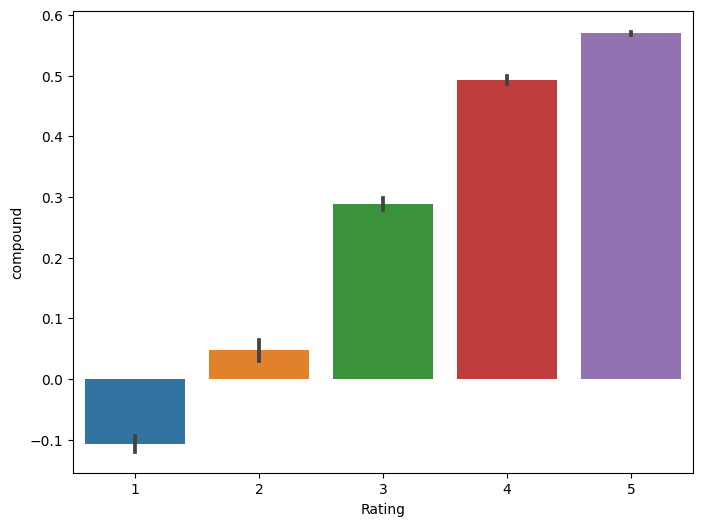

In [358]:
#compare the compound score vs the star review
sns.barplot(data = df2, x='Rating', y = 'compound')
plt.show()

In [322]:
#Replace ratings with somethign we can compare to vader

df2['Rating'] = df2['Rating'].astype(str)
df2['Rating'] = df2['Rating'].replace(['5'],'pos')
df2['Rating'] = df2['Rating'].replace(['4'],'pos')
df2['Rating'] = df2['Rating'].replace(['3'],'neu')
df2['Rating'] = df2['Rating'].replace(['2'],'neg')
df2['Rating'] = df2['Rating'].replace(['1'],'neg')

In [323]:
df2['Result'] = df2['Rating'] == df2['comp_score']
df2

,Rating,asin,reviews,scores,compound,comp_score,Result
0,pos,700026657,"This game is a bit hard to get the hang of, bu...","{'neg': 0.058, 'neu': 0.671, 'pos': 0.271, 'co...",0.7543,pos,True
1,pos,700026657,I played it a while but it was alright. The st...,"{'neg': 0.132, 'neu': 0.61, 'pos': 0.259, 'com...",0.8302,pos,True
2,neu,700026657,ok game.,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,pos,False
3,neg,700026657,"found the game a bit too complicated, not what...","{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...",0.3400,pos,False
4,pos,700026657,"great game, I love it and have played it since...","{'neg': 0.0, 'neu': 0.428, 'pos': 0.572, 'comp...",0.8934,pos,True
...,...,...,...,...,...,...,...
110793,pos,B01HFRICLE,This is the RIver City Ransom sequel that I've...,"{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'comp...",0.8617,pos,True
110794,pos,B01HFRICLE,If you played and enjoyed River City Ransom on...,"{'neg': 0.041, 'neu': 0.759, 'pos': 0.201, 'co...",0.7096,pos,True
110795,pos,B01HFRICLE,Old school classic,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,True
110796,neu,B01HFRICLE,This nostalgic game with updaged game play ele...,"{'neg': 0.065, 'neu': 0.627, 'pos': 0.308, 'co...",0.8151,pos,False


In [325]:
df2['Result'].value_counts()

True     90288
False    20510
Name: Result, dtype: int64

In [379]:
count_row = df2.shape[0]

In [382]:
#Calculating the success rate of Vader 
success_rate = 90288/count_row
success_rate

0.8148883553854763

### Overall, Vader has a 81% accuracy on determining the sentiment of reviews